In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(trainimages, trainlabels),(testimages,testlabels) = datasets.cifar10.load_data()
trainimages=trainimages/255.0
testimages=testimages/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

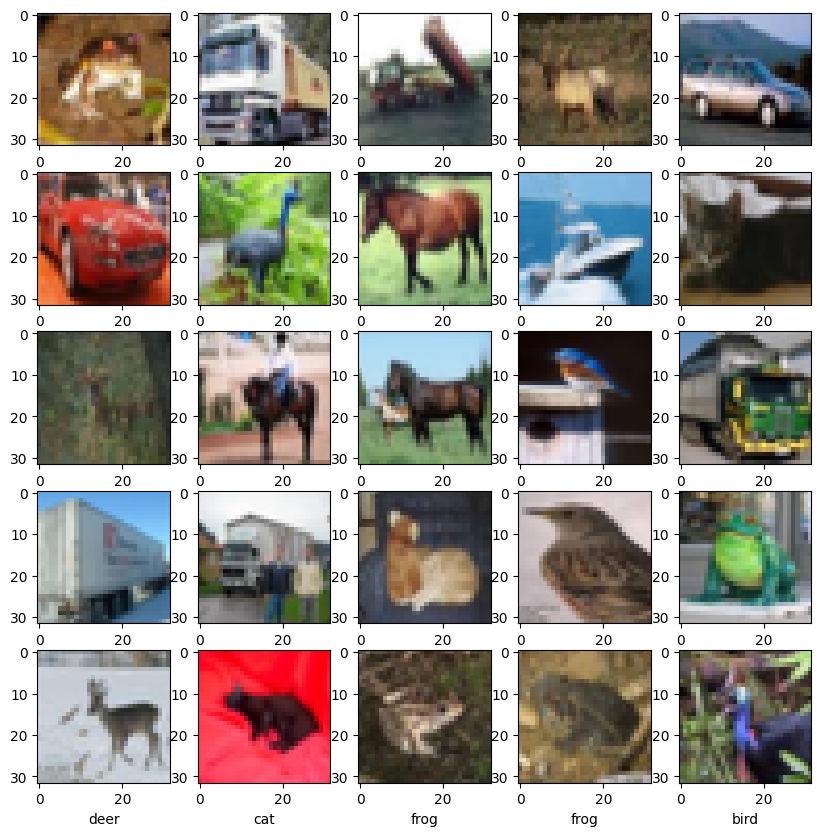

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(trainimages[i])
    plt.xlabel(class_names[trainlabels[i][0]])
plt.show()

In [5]:
model=models.Sequential()
model.add(layers.Input(shape=(32,32,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainimages, trainlabels, epochs=50, 
                    validation_data=(testimages, testlabels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3572 - loss: 1.7486 - val_accuracy: 0.5591 - val_loss: 1.2430
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5754 - loss: 1.1974 - val_accuracy: 0.5972 - val_loss: 1.1211
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6417 - loss: 1.0209 - val_accuracy: 0.6481 - val_loss: 1.0009
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6761 - loss: 0.9207 - val_accuracy: 0.6541 - val_loss: 0.9827
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7118 - loss: 0.8380 - val_accuracy: 0.6868 - val_loss: 0.9071
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7298 - loss: 0.7646 - val_accuracy: 0.6868 - val_loss: 0.9069
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7518 - loss: 0.7111 - val_accuracy: 0.6999 - val_loss: 0.8729
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7674 - loss: 0.6638 - 

313/313 - 0s - 2ms/step - accuracy: 0.6983 - loss: 1.2257
0.6983000040054321


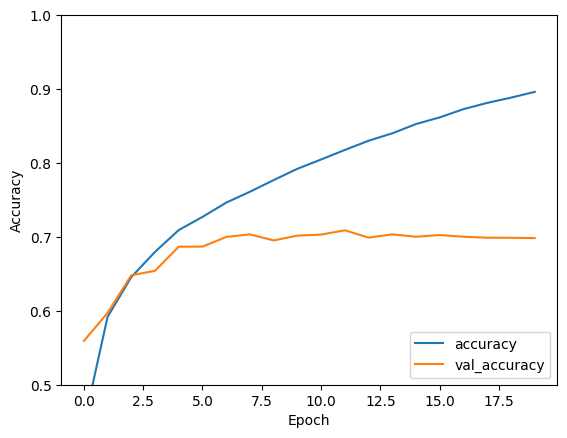

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testimages,  testlabels, verbose=2)

print(test_acc)

In [8]:
model.save("Picture.keras")